# Capítulo 13: Redes Neuronales Recurrentes

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, SimpleRNN

unidades = 10
pasos = 3
entrada=2
model = Sequential()
model.add(Input(shape=(pasos, entrada)))
model.add(SimpleRNN(unidades))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130 (520.00 B)

 Trainable params: 130 (520.00 B)

 Non-trainable params: 0 (0.00 B)

## <b>Modelado del lenguaje con una RNN SIMPLE</b>

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from keras.optimizers import Adam

texto = """Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos"""

In [86]:
# Tokenización
tokenizador = Tokenizer()
tokenizador.fit_on_texts([texto])
tam_vocab = len(tokenizador.word_index) + 1

# Convertir el texto en secuencias de enteros
secuencias = []
for linea in text.split('.'):
    lista_tokens = tokenizador.texts_to_sequences([linea])[0]
    for i in range(1, len(lista_tokens)):
        secuencia_ngramas = lista_tokens[:i+1]
        secuencias.append(secuencia_ngramas)

# Padding de las secuencias
long_max_secuencia = max([len(x) for x in secuencias])
secuencias = np.array(pad_sequences(secuencias, maxlen=long_max_secuencia, padding='pre'))

# Crear X e y
X = secuencias[:,:-1]
y = secuencias[:,-1]
y = to_categorical(y, num_classes=tam_vocab)

In [92]:
modelo = Sequential()
modelo.add(Embedding(tam_vocab, 50, input_length=long_max_secuencia-1))
modelo.add(SimpleRNN(100))
modelo.add(Dense(tam_vocab, activation='softmax'))
modelo.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_12 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
modelo.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
historico = modelo.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0210 - loss: 4.0782
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0210 - loss: 4.1404
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1053 - loss: 3.8526
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0947 - loss: 3.6894
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0736 - loss: 3.7145
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0630 - loss: 4.6138
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1472 - loss: 3.7449
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1367 - loss: 3.8572
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1262 - loss: 3.8596
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0949 - loss: 3.8219
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1159 - loss: 3.7717
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1683 - lo

In [98]:
def predecir_siguiente_palabra(modelo, tokenizador, texto, long_seq_max):
    lista_tokens = tokenizador.texts_to_sequences([texto])[0]
    lista_tokens = pad_sequences([lista_tokens], maxlen=long_seq_max-1, padding='pre')
    prediccion = modelo.predict(lista_tokens, verbose=0)
    prediccion = tokenizador.index_word[np.argmax(prediccion)]
    return prediccion

# Ejemplo de predicción
texto_prueba = "El coronel Aureliano"
siguiente_palabra = predecir_siguiente_palabra(modelo, tokenizador, texto_prueba, long_max_secuencia)
print(f"Próxima palabra: {siguiente_palabra}")

Próxima palabra: buendía


## <b>Predicción del sentimiento mediante una LSTM</b>

In [104]:
from keras.datasets import imdb

tam_vocab = 10000  # Limitar el vocabulario a las 10,000 palabras más comunes
long_max = 100   # limitar el tamaño de las secuencias
conj_entrenamiento, conj_prueba = imdb.load_data(num_words=tam_vocab)
X_train, y_train = conj_entrenamiento
X_test, y_test = conj_prueba

In [105]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [106]:
palabra_a_id = imdb.get_word_index()
palabra_a_id = {clave:(valor+3) for clave,valor in palabra_a_id.items()}
palabra_a_id["<PAD>"] = 0
palabra_a_id["<START>"] = 1
palabra_a_id["<UNK>"] = 2
palabra_a_id["<UNUSED>"] = 3
ind_palabra = {valor:clave for clave,valor in palabra_a_id.items()}

In [107]:
print(' '.join(ind_palabra[id] for id in X_train[9] ))

<START> this movie has many problem associated with it that makes it come off like a low budget class project from someone in film school i have to give it credit on its <UNK> though many times throughout the movie i found myself laughing hysterically it was so bad at times that it was comical which made it a fun watch br br if you're looking for a low grade slasher movie with a twist of psychological horror and a dash of campy <UNK> then pop a bowl of popcorn invite some friends over and have some fun br br i agree with other comments that the sound is very bad dialog is next to impossible to follow much of the time and the soundtrack is kind of just there


In [108]:
print("Etiqueta:", y_train[9])

Etiqueta: 0


In [109]:
print(' '.join(ind_palabra[id] for id in X_train[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [110]:
print("Etiqueta:", y_train[0])

Etiqueta: 1


In [111]:
from keras.preprocessing import sequence
X_train_padded = sequence.pad_sequences(X_train, maxlen= long_max)
X_test_padded = sequence.pad_sequences(X_test, maxlen= long_max)
print("Forma de X_train: {}".format(X_train_padded.shape))
print("Forma de X_test: {}".format(X_test_padded.shape))

Forma de X_train: (25000, 100)
Forma de X_test: (25000, 100)


In [112]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(Embedding(input_dim = tam_vocab, output_dim = 128, input_length=long_max))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [114]:
historico = model.fit(x=X_train_padded, y=y_train,
                   batch_size = 128, epochs=10, 
                   validation_data=(X_test_padded, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 302ms/step - accuracy: 0.7225 - loss: 0.5362 - val_accuracy: 0.8475 - val_loss: 0.3446
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 57s 291ms/step - accuracy: 0.8958 - loss: 0.2653 - val_accuracy: 0.8471 - val_loss: 0.3543
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 295ms/step - accuracy: 0.9265 - loss: 0.1941 - val_accuracy: 0.8453 - val_loss: 0.3732
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.9456 - loss: 0.1502 - val_accuracy: 0.8126 - val_loss: 0.5424
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 60s 304ms/step - accuracy: 0.9586 - loss: 0.1126 - val_accuracy: 0.8327 - val_loss: 0.4728
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 296ms/step - accuracy: 0.9678 - loss: 0.0930 - val_accuracy: 0.8326 - val_loss: 0.5001
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 62s 316ms/step - accuracy: 0.9770 - loss: 0.0695 - val_accuracy: 0.8203 - val_loss: 0.5769
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 294ms/step - accuracy: 0.9780 - loss: 0

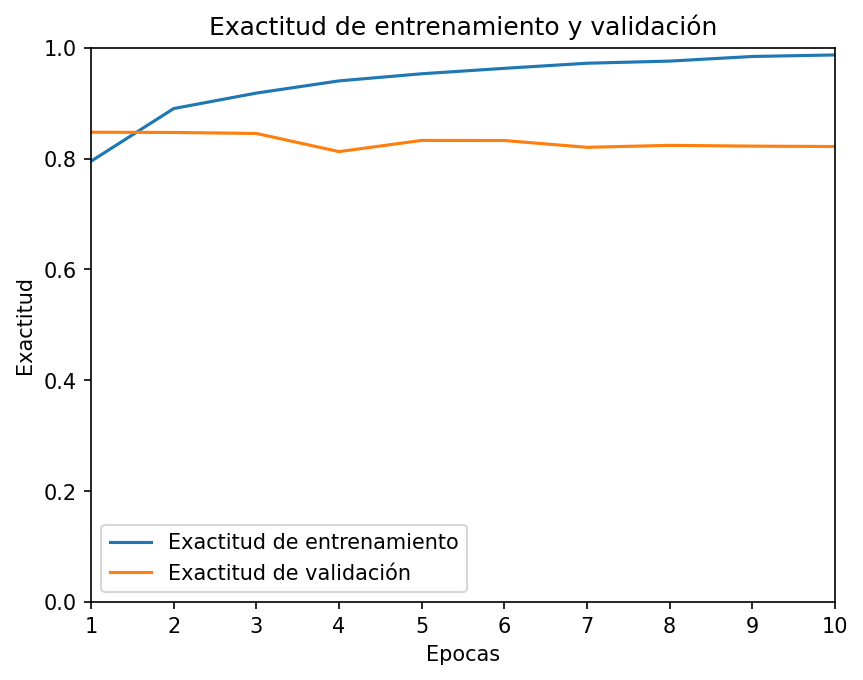

In [115]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.plot(range(1,11), historico.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(range(1,11), historico.history['val_accuracy'], 
         label='Exactitud de validación')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()
plt.show()

In [118]:
texto_neg = X_test[9]
texto_pos = X_test[13]
textos = (texto_neg, texto_pos)
textos = pad_sequences(textos, maxlen=100, value = 0.0) 
preds = model.predict(textos)
print("Predicción Ejemplo 1:" , preds[0])
print("Sentimiento Ejemplo 1:", "Positivo" if preds[0] >= 0.5 else "Negativo")
print("Predicción Ejemplo 2:" , preds[1])
print("Sentimiento Ejemplo 2:", "Positivo" if preds[1] >= 0.5 else "Negativo")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicción Ejemplo 1: [0.98516166]
Sentimiento Ejemplo 1: Positivo
Predicción Ejemplo 2: [0.00211817]
Sentimiento Ejemplo 2: Negativo


In [119]:
puntajes = model.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[1]))

Exactitud: 0.82


## <b>Clasificador de sentimientos mediante GRU</b>

In [150]:
from tensorflow.keras.layers import GRU, Dropout

In [154]:
modelo_gru = Sequential() 
modelo_gru.add(Embedding(input_dim = tam_vocab, input_length=long_max, output_dim=128))
modelo_gru.add(GRU(128))
modelo_gru.add(Dense(1, activation='sigmoid'))

modelo_gru.summary()
modelo_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [155]:
historico_gru = modelo_gru.fit(X_train_padded, y_train, batch_size=128, validation_data=(X_test_padded, y_test), epochs = 10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 297ms/step - accuracy: 0.6199 - loss: 0.6423 - val_accuracy: 0.8305 - val_loss: 0.3810
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 57s 289ms/step - accuracy: 0.8707 - loss: 0.3101 - val_accuracy: 0.8451 - val_loss: 0.3560
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 55s 281ms/step - accuracy: 0.9130 - loss: 0.2275 - val_accuracy: 0.8423 - val_loss: 0.3699
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 61s 313ms/step - accuracy: 0.9375 - loss: 0.1718 - val_accuracy: 0.8397 - val_loss: 0.4205
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 295ms/step - accuracy: 0.9599 - loss: 0.1196 - val_accuracy: 0.8285 - val_loss: 0.4787
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 339ms/step - accuracy: 0.9665 - loss: 0.0957 - val_accuracy: 0.8293 - val_loss: 0.6071
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 342ms/step - accuracy: 0.9794 - loss: 0.0610 - val_accuracy: 0.8254 - val_loss: 0.6854
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 61s 312ms/step - accuracy: 0.9847 - loss: 0

In [157]:
puntajes = modelo_gru.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[0]))

Exactitud: 0.90


## <b>Prueba con RNN Bidireccional</b>

In [135]:
from tensorflow.keras.layers import Bidirectional

In [160]:
modelo_bidireccional = Sequential() 
modelo_bidireccional.add(Embedding(input_dim = tam_vocab, input_length=long_max, output_dim=128)) 
modelo_bidireccional.add(Bidirectional(LSTM(128)))
modelo_bidireccional.add(Dense(1, activation='sigmoid'))

In [161]:
modelo_bidireccional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelo_bidireccional.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [162]:
historico = modelo_bidireccional.fit(X_train_padded, y_train, batch_size=128, validation_data=(X_test_padded, y_test), epochs = 10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 107s 499ms/step - accuracy: 0.7122 - loss: 0.5344 - val_accuracy: 0.8456 - val_loss: 0.3532
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 109s 554ms/step - accuracy: 0.8945 - loss: 0.2653 - val_accuracy: 0.8479 - val_loss: 0.3527
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 115s 587ms/step - accuracy: 0.9272 - loss: 0.1935 - val_accuracy: 0.8450 - val_loss: 0.3826
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 110s 565ms/step - accuracy: 0.9465 - loss: 0.1466 - val_accuracy: 0.8394 - val_loss: 0.4332
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.9640 - loss: 0.1017 - val_accuracy: 0.8262 - val_loss: 0.6006
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 116s 593ms/step - accuracy: 0.9790 - loss: 0.0635 - val_accuracy: 0.8276 - val_loss: 0.6671
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 110s 564ms/step - accuracy: 0.9832 - loss: 0.0514 - val_accuracy: 0.8247 - val_loss: 0.7263
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 600ms/step - accuracy: 0.9920 -

In [163]:
puntajes = modelo_bidireccional.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[0]))

Exactitud: 0.93


## <b>Prueba con RNN de capas apiladas</b>

In [186]:
modelo_apilado = Sequential() 
modelo_apilado.add(Embedding(input_dim = tam_vocab, input_length=long_max, output_dim=128)) 
modelo_apilado.add(LSTM(128, return_sequences=True))
modelo_apilado.add(Dropout(0.1))
modelo_apilado.add(GRU(64))
modelo_apilado.add(Dropout(0.1))
modelo_apilado.add(Dense(1, activation='sigmoid')) 
modelo_apilado.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelo_apilado.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_39 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [187]:
historico = modelo_apilado.fit(X_train_padded, y_train, batch_size=128, validation_data=(X_test_padded, y_test), epochs = 10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 572ms/step - accuracy: 0.7267 - loss: 0.5126 - val_accuracy: 0.8402 - val_loss: 0.3745
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 127s 651ms/step - accuracy: 0.9005 - loss: 0.2464 - val_accuracy: 0.8443 - val_loss: 0.3719
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 125s 640ms/step - accuracy: 0.9334 - loss: 0.1751 - val_accuracy: 0.8398 - val_loss: 0.3926
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 121s 620ms/step - accuracy: 0.9562 - loss: 0.1223 - val_accuracy: 0.8288 - val_loss: 0.4670
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 126s 641ms/step - accuracy: 0.9684 - loss: 0.0904 - val_accuracy: 0.8245 - val_loss: 0.5768
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 123s 628ms/step - accuracy: 0.9812 - loss: 0.0571 - val_accuracy: 0.8192 - val_loss: 0.6822
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 119s 609ms/step - accuracy: 0.9823 - loss: 0.0514 - val_accuracy: 0.8133 - val_loss: 0.8640
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 118s 603ms/step - accuracy: 0.9882 -

In [189]:
puntajes = modelo_apilado.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[0]))

Exactitud: 1.05
